<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning-KISD-2024/blob/main/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

Lecture 2


##**<font color = "green">Decision Trees and ensamble learning:  Boosted Decision Trees (BDT) <br> Independent Component Analsis (ICA) </font>**

*13 March 2024*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_20.png)


#<font color='green'>**Topics:**



* decision trees,
* ensamble learning - Boosted / Bagged Decision Trees BDTs,
* example program- face recognition,
* Independent Component Analysis ICA

<br>
<br>

<span style="color:#C9211E"> **All slides are available here:** </span>  
https://github.com/marcinwolter/MachineLearning-KISD-2024





#<font color='green'>**Simple classifiers**

* <span style="color:#000000">We have learned about:</span>
  * <span style="color:#000000">Classifiers:</span>
    * <span style="color:#000000">Cuts</span>
    * <span style="color:#000000">Fisher Linear Discriminant</span>
    * <span style="color:#000000">Naive Bayes</span>
    * <span style="color:#000000">Kernel Density Estimators</span>
  * <span style="color:#000000">Unsupervised method</span>
    * <span style="color:#000000">Decorrelation</span>
    * <span style="color:#000000">Principal Component Analysis</span>
* <span style="color:#000000">**Today we will talk about:**</span>
  * <span style="color:#000000">Decission Trees</span>
  * <span style="color:#000000">Boosted / Bagged Decision Trees BDT\.</span>
  * <span style="color:#000000">Example of face classification – eigenfaces\.</span>
  * <span style="color:#000000">Independent Component Analysis ICA\.</span>




---



---



---



# <font color='green'> **Decision trees**

* <span style="color:#000000">**Decision tree** – a series of cuts\, each „leaf” \(A\,B\,C\,D\,E\) has a label\, for example ”signal” and “background”\.</span>

* <span style="color:#000000">Easy in visualization and interpretation</span>

* <span style="color:#000000">Resistant for </span>  <span style="color:#000000"> _outliers_ </span>  <span style="color:#000000">\. </span>

* <span style="color:#000000">Weak variables are ignored\.</span>

* <span style="color:#000000">Fast training and classification\.</span>

* <span style="color:#000000">**Unfortunately:** </span>  <span style="color:#000000"> __sensitive for fluctuations\, unstable__ </span>  <span style="color:#000000">\. </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_234.png' width=350px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_235.png' width=350px>





# <font color='green'> **Building the tree**



* <span style="color:#000000">We start from the root\.</span>

* <span style="color:#000000">We divide the training sample by **the best separating cut** on the best variable\.</span>

* <span style="color:#000000">We repeat the procedure until the stopping conditions are fulfilled\, for example: number of leafs\, number of events in a leaf etc\. </span>

* <span style="color:#000000">The ratio S/B in a leaf defines the classification \(binary signal or background\, or a real number giving the probability\, that a given event is a signal\)\.</span>

<span style="color:#000000"> __Definitions of separation:__ </span>

* <span style="color:#000000">Gini inpurity:  \(</span>  <span style="color:#000000"> _Corrado Gini 1912\, invented the Gini index used to measure the inequality of incomes_ </span>  <span style="color:#000000">\)</span>

$$ purity = p (1-p), ~~   p= P(signal)$$,

* <span style="color:#000000">Cross\-entropy:</span>

$$cross\_entropy = -(p \ln p + (1-p)\ln(1-p))$$

* <span style="color:#000000">Missidentification:</span>

$$miss\_identification = 1-max(p,1-p)$$



# **Example of classifier use**


In [31]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


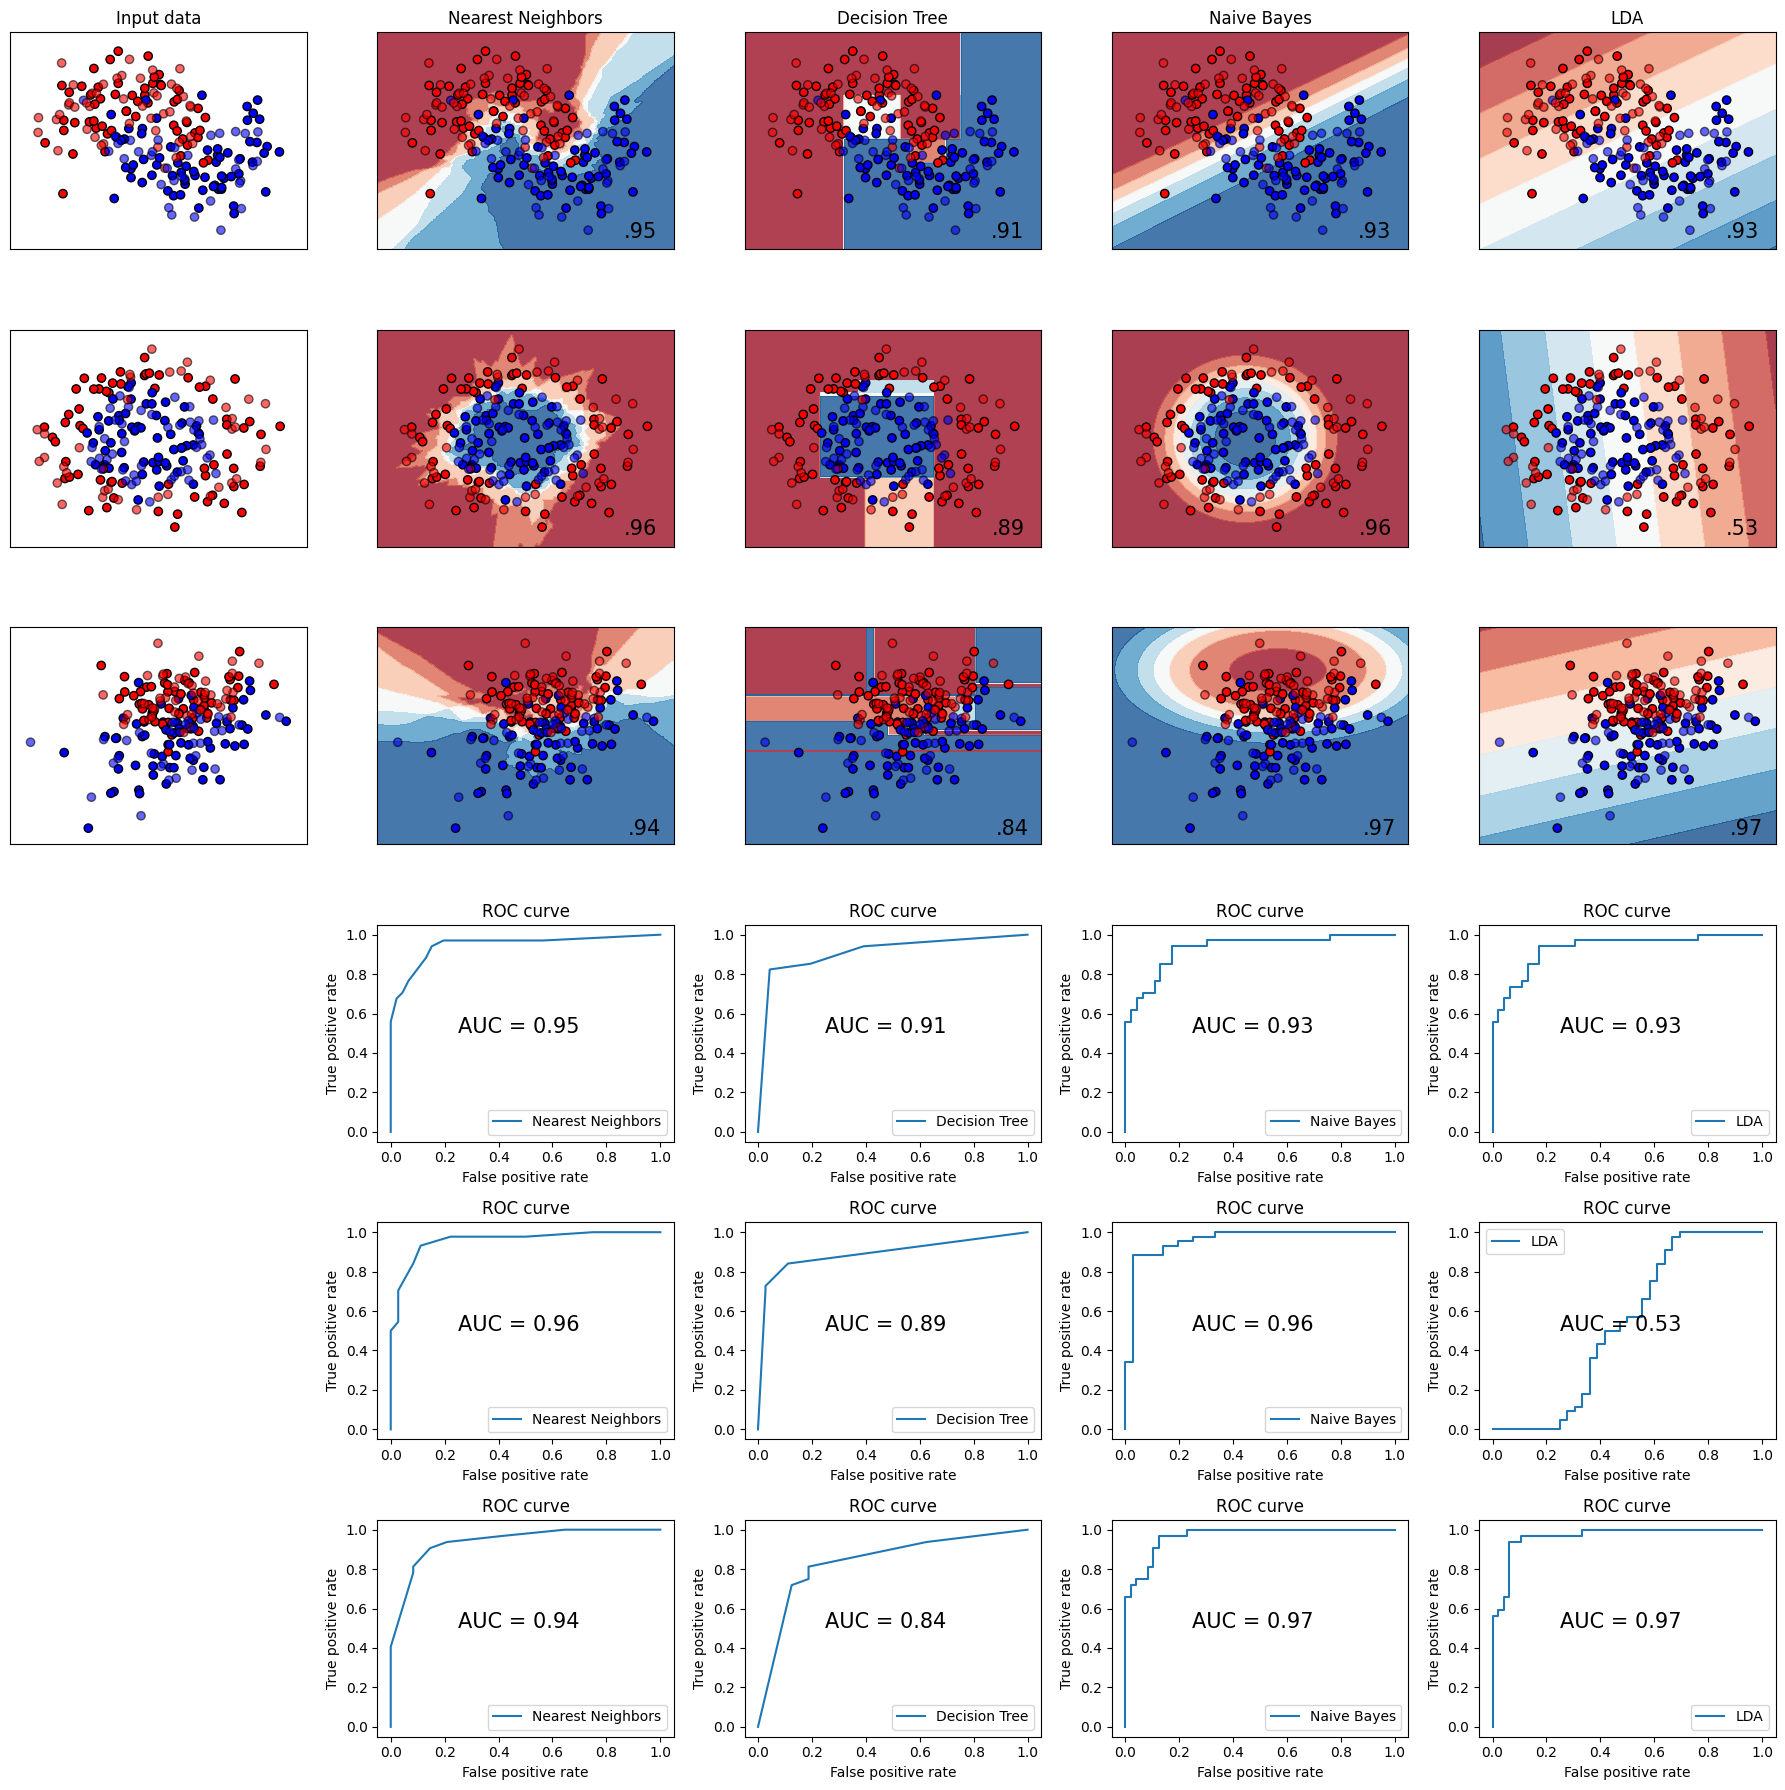

In [32]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Modified by MW

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# ensamble learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors",
         "Decision Tree",
         #"AdaBoost",
         "Naive Bayes",
         "LDA"]

classifiers = [
    KNeighborsClassifier(9),
    DecisionTreeClassifier(max_depth=5),
    #AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),n_estimators=100),
    GaussianNB(),
    LinearDiscriminantAnalysis()
    ]

# number of generated events
n_samples=200

X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=n_samples, noise=0.3, random_state=0),
            make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(18, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])
        if (name=='MLP'):
          mlp=clf

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        # print score in plot
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

        # plot the roc curve
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i+len(datasets)*(len(classifiers)+1))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        ax.plot(fpr, tpr, label=name)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        ax.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')


        i += 1

plt.tight_layout()
plt.show()

**Remark**:

We have plotted the ROC curve and calculated the integral.


# <font color='red'> **Exercise:**
* <mark>play with the parameters of classifiers
* <mark>and the number of generated data points.



---



---



---




#<font color='green'> **Boosting\, bagging\, BDT… ensemble learning**


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_428.png' width=450px>

<br>

##<font color='red'>**Ensamble learning:** using many weak classifiers to build a strong one.

<span style="color:#800000"> __What does BDT mean???__ </span>

* <span style="color:#000080"> __BDT – Boosted Decision Tree:__ </span>
  * <span style="color:#000000"> __Decision Tree__ </span>  <span style="color:#000000"> – an algorithm known for a long time\, used in many expert systems\. For example\, the first aid manual is frequently written in the form of a decision tree: if \(condition\) do something\, else do something different\, then check another condition\.\.\.</span>
  * <span style="color:#000000"> __Boosted__ </span>  <span style="color:#000000">  \- a method of joining many weak classifiers in an ensemble to get one strong classifier\. It is not limited to decision trees\, however it is most commonly used for decision trees\.</span>

* <span style="color:#800000"> __Boosting – ensemble of classifiers__ </span>

 * <span style="color:#008000"> __Problem: could we improve a weak classifier?__ </span>
 * <span style="color:#008000"> __Answer: yes\, by applying it many times\.__ </span>
 * <span style="color:#000000">An algorithm used most frequently:</span>  <span style="color:#000000"> __AdaBoost__ </span>  <span style="color:#000000">\(Freund & Schapire 1996 – Gödel prize\)</span>

<table>
<tbody>
  <tr>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_431.png' width=150px>
</td>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_430.png' width=150px></td>
  </tr>
  <tr>
    <td>Robert Schapire</td>
    <td>Yoav Freund</td>
  </tr>  
</tbody>
</table>









# <font color='green'>**How to perform boosting?**

* <span style="color:#000000">Build a decision tree\.</span>

* <span style="color:#000000">Increase the weights of **wrongly** classified events\.</span>

* <span style="color:#000000">Repeat many times \(typically 100\-1000\).</span>
As a result we get a "forest" of many trees.



* <span style="color:#000000">At the end classify the events by “voting” of all the trees\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_429.png' width=650px>




<span style="color:#800000"> __AdaBoost in action__ </span>


In [33]:
# Display the movie

! wget https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/AdaBoostInAction.mp4

from IPython.display import HTML
from base64 import b64encode
mp4 = open('AdaBoostInAction.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)



--2024-03-12 00:38:28--  https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/AdaBoostInAction.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 737578 (720K) [application/octet-stream]
Saving to: ‘AdaBoostInAction.mp4’

AdaBoostInAction.mp 100%[===================>] 720.29K  --.-KB/s    in 0.05s   

2024-03-12 00:38:29 (15.3 MB/s) - ‘AdaBoostInAction.mp4’ saved [737578/737578]



#**AdaBoost in action**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_432.png' width=650px>

AdaBoost for 2\-dimensional data – results after 1st\, 2nd\, 3rd\, 5th\, 10th and 100th iteration\. The solid green line shows the results of the combined classifier\, the dashed line the borders between classes obtained after each step\.  For the last two plots the dotted line marks the class borders obtained from the bagging algorithm \(we will talk about bagging soon\)\.


#<font color='green'>**Boosting in detail**

* <span style="color:#000000">Five years after publication of AdaBoost Friedman has proven\, that the algorithm in fact minimizes the exponential loss function:</span>

$$ E = \sum_{n=1}^N \exp{(-t_n f_m(x_n))}  $$

where $f(x)$ is the answer of the algorithm, <br>
$t = 1$ signal, $t = -1$ background <br>
* $t_n\cdot f_m(x_n)>0$ – correctly classified
* $t_n\cdot f_m(x_n)<0$ – incorrectly classified

Index $m$ is the iteration number.

<br>

<span style="color:#000000">Exponential function goes up quickly => huge punishment for wrongly classified events\, so the algorithm is sensitive for single\, outstanding points\. Classification becomes worse\, when data are hardly separable\. </span>



<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_434.gif' width=450px>




#<font color='green'>**AdaBoost algorithm in detail**</font>

1.   Give all vectors from the training set a weight $w_i =1/N$.
2.   For $m = 1,...,M$:

 * Train classifiers $y_m(x)$ on the training sample minimizing:
 $$ J_m= \sum_{n=1}^N w_n^m I(y_m(x_n) \neq  t_n)$$
 where $I(y_m(x_n) \neq  t_n)$ is an indicator function and equals 1 if $y_m(x_n) \neq  t_n$ and 0 otherwise.

 * Evaluate the quantities:
 $$  \epsilon_m = \frac{\sum_{n=1}^N w_n^m I(y_m(x_n) \neq  t_n)}{\sum_{n=1}^N w^m_n}   $$

 $$ \alpha_m = \frac{1}{2} \ln\frac{1-\epsilon_m}{\epsilon_m}$$

 *  Update the weights of the vectors in the training sample:

$$ w_n^{m+1} = w^m_n \cdot e^{\alpha_m I(y_m(x_n) \neq  t_n)} $$

<!---  
 $$ w_n^{m+1} = \left\{ \begin{aligned}
 \frac{w^m_n}{Z_m}e^{\alpha_m} ~~& for&~~ y_m(x_n) \neq t_n\\
 \frac{w^m_n}{Z_m}e^{-\alpha_m} ~~& for&~~ y_m(x_n) = t_n
 \end{aligned}\right. $$
--->

<span style="color:#000000">The result of voting is given as:</span>

$$ Y_M({\bf x}) = sign{\left( \sum_{m=1}^M \alpha_m y_m({\bf x}) \right)}$$

<span style="color:#000000">All the classifiers are trained on the same training sample\, but with different weights\. These weights depend on the results of the preceding training\, so it’s difficult to train many classifiers in parallel\.</span>

*C. Bishop, Pattern recognition and machine learning. Springer, 2009.*






#**Classifier boosting**

<span style="color:#000000">Boosting – in a “magical” way we get a strong classifier out of weak ones</span>

<span style="color:#000000"> __Typically boosting used on decision trees – Boosted Decision Trees BDT__ </span>  but might be also applied to another classifiers.

 * <span style="color:#000000">Good results without time consuming tuning of parameters:         </span>



 * <span style="color:#000000">Relatively resistant on overtraining\.</span>

 * <span style="color:#000000">Quite frequently used and with good results\!</span>

<br>

###**Application of a boosting algorithm \(5 iterations\) to the Naive Bayes classifier\.**

<table>
<tbody>
  <tr>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_442.png' width=300px></td>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_443.png' width=300px></td>
  </tr>
  <tr>
    <td> Naive Bayes</td>
    <td>5 times boosted Naive Bayes</td>
  </tr>
</tbody>
</table>







#<font color='green'> **Bagging \(Bootstrap AGGregatING\)**

* <span style="color:#000080"> __Algorithm proposed by Leo Breiman in 1994:__ </span>
  * <span style="color:#000000">Take N events from N\-element training set\, **but with repetitions**\.</span>
  * <span style="color:#000000">Train the classifier on this set\.</span>
  * <span style="color:#000000">Repeat many times</span>
  * <span style="color:#000000">Classify new events by voting of all the classifiers\.</span>




<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_445.png' width=450px>

For this data the red line \(mean of 100 classifiers\) is smoother\, more stable and more resistant for overtraining the any of the single classifiers\.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_444.png' width=450px>

<span style="color:#000000">Analogy: mean of many poorly fitting functions gives a good fitting function\. </span>



#<font color='green'>**Bagging vs\. boosting**

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_446.png)

Test error for Bagging\, Discrete AdaBoost and Real AdaBoost on a simulated two\-class nested spheres problem\. There are 2000 training data points in ten dimensions\.

*Friedman 2000*.



#<font color='green'> **Ensemble methods**
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

* In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br> Averaging methods are **easy to parallelize**. <br> *Examples: Bagging methods, …*

* By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. <br> Results of the next step depend on the previous step - **hard to parallelize**<br> *Examples: AdaBoost,  …* <br>





<span style="color:#800000"> __Ensemble Learning example__ </span>

Example code to run various classification tasks\, also with ensemble learning.



In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=8000, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=12000, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True)





# Create and fit a classifier
clf = DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=6000)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=600)
#clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5),max_samples=0.009,n_estimators=600)

# Here we have Boosted/Bagged Naive Bayes!
#clf = GaussianNB()
#clf = AdaBoostClassifier(learning_rate=2.5,estimator=GaussianNB(),n_estimators=500,algorithm='SAMME.R') #,algorithm='SAMME.R')
#clf = BaggingClassifier(GaussianNB(),max_samples=0.009,n_estimators=500)

#clf = KNeighborsClassifier(n_neighbors=3)
#clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),n_estimators=500)


#clf = LinearDiscriminantAnalysis()
#clf = BaggingClassifier(LinearDiscriminantAnalysis(),max_samples=8,n_estimators=70)

# More variations of ensamble learning
#clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
#clf = RandomForestClassifier(n_estimators=200)


clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

Plotting the test points
Plotting  1  datapoints.
Plotting  1  datapoints.


<ipython-input-35-6c5cd92fb522>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[idx, 0], X_test[idx, 1],


Text(0.5, 1.0, 'Decision Boundary')

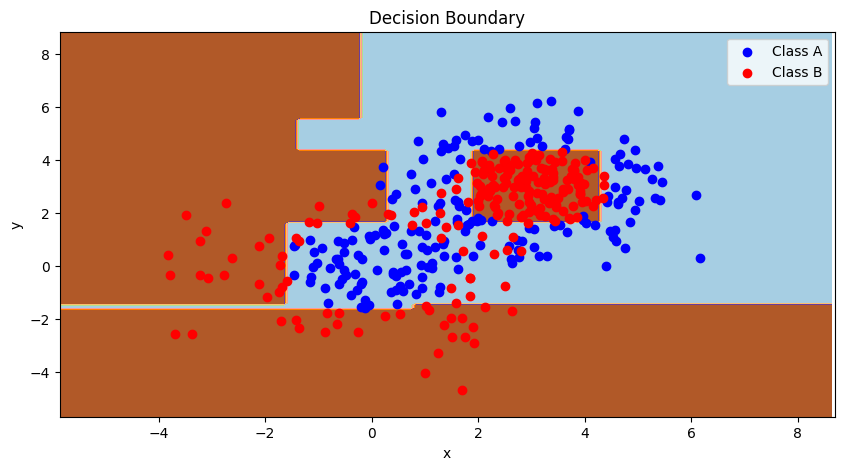

In [35]:

plot_colors = "br"
plot_step = 0.1
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the test points
print("Plotting the test points")
for i, n, c in zip(range(2), class_names, plot_colors):
    # plot first 400 test data points
    N = min(400,len(y_test))
    idx = np.where(y_test[0:N] == i)
    print("Plotting ",len(idx)," datapoints.")
    plt.scatter(X_test[idx, 0], X_test[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

Text(0.7, 0.5, 'AUC = 0.94')

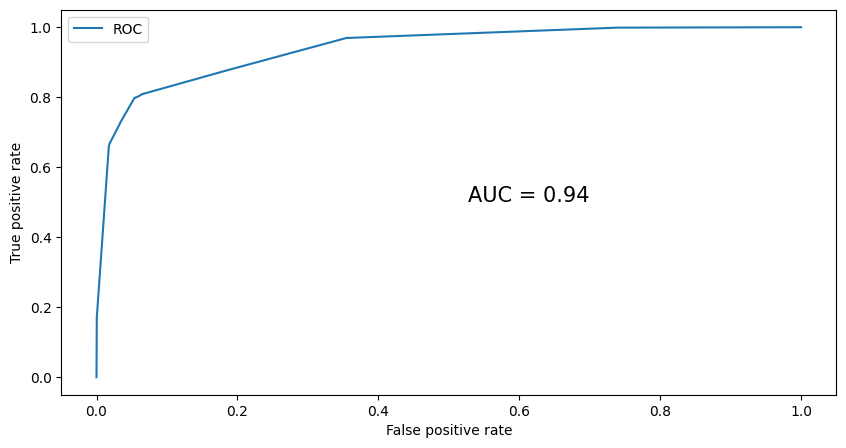

In [36]:
        # plot the roc curve
        figure = plt.figure(figsize=(10, 5))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        plt.plot(fpr, tpr, label="ROC")
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        #plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        plt.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')




---


# <font color='red'> **Exercise:**
* <mark>play with bagging and boosting and check, how ensamble methods improve the classification

#<font color='green'> **Summary of Boosting and Bagging**

* Boosting, bagging – in a magic way we can build a strong classifier out of weak ones.
* Commonly used for decision trees, because they are simple and fast.
* Gives good results:
 -  „the best out-of-box classification algorithm”.



---
---
---




# <font color='green'>**Complete example - classification of faces**

**Use of PCA and various classifiers**

<span style="color:#000000">PCA – each face can be represented as a combination of a limited number of “eigenfaces” (like for hand-written digits recognition).</span>


In [37]:
%matplotlib inline


# Faces recognition example using eigenfaces


The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======


Example from https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
modified by MW

In [38]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from scipy.stats import randint

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

from sklearn.decomposition import PCA



#print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



In [39]:

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1] # number of pixels

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [40]:

# #############################################################################
# Split into a training set and a test set

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Scaling - very important!!!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

# number of PCA components
n_components = 128 #128 #64 #32 #16 #8

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train the classification model

print("Fitting the classifier to the training set")
t0 = time()

#clf = KNeighborsClassifier(10)
#clf = GaussianNB()
clf = LinearDiscriminantAnalysis()
#clf = DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100)
#clf = GradientBoostingClassifier(max_depth=1,n_estimators=5000)

'''
# Example of a simple hyperparameter optimization
# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)
'''
'''
# Optimize the GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=1)
# grid of n_neighbours to be tested
param_grid = {'n_estimators': [2, 4, 8, 16, 32, 64, 256, 1024], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
print("GridSearch results: ",clf.cv_results_)

# This value gives the best performance
print('Best params: ',clf.best_params_)
clf = GradientBoostingClassifier(max_depth=1,n_estimators=clf.best_params_['n_estimators'])

print("done in %0.3fs" % (time() - t0))
'''

# Fit the classifier
clf = clf.fit(X_train_pca, y_train)




Extracting the top 128 eigenfaces from 966 faces
done in 0.350s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s
Fitting the classifier to the training set


In [41]:


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)



print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print(" ")
print("Train accuracy: ",balanced_accuracy_score(y_train, clf.predict(X_train_pca)))
print("Test  accuracy: ",balanced_accuracy_score(y_test,  clf.predict(X_test_pca)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.69      0.64        13
     Colin Powell       0.81      0.90      0.85        60
  Donald Rumsfeld       0.76      0.70      0.73        27
    George W Bush       0.91      0.92      0.91       146
Gerhard Schroeder       0.80      0.80      0.80        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.87      0.72      0.79        36

         accuracy                           0.84       322
        macro avg       0.79      0.77      0.78       322
     weighted avg       0.85      0.84      0.84       322

[[  9   2   2   0   0   0   0]
 [  2  54   1   2   0   1   0]
 [  4   1  19   2   1   0   0]
 [  0   5   3 134   2   1   1]
 [  0   1   0   2  20   1   1]
 [  0   2   0   1   0  10   2]
 [  0   2   0   6   2   0  26]]
 
Train accuracy:  0.933110425155448
Test  accuracy:  0.771815500582624


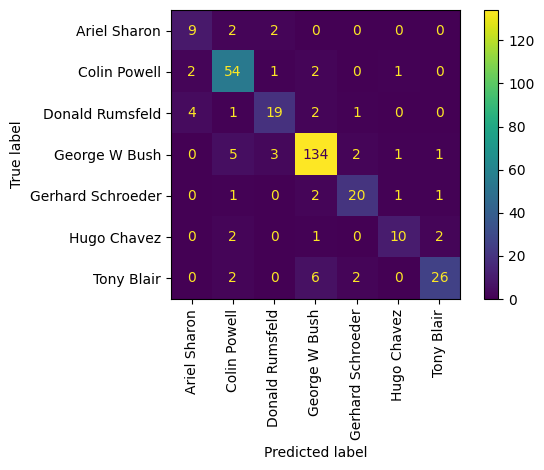

In [42]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Reference for clf = LinearDiscriminantAnalysis() and PCA n_components = 128:

* Train accuracy:  0.93
* Test  accuracy:  0.78

In [43]:
# define a funtion to plot the gallery

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


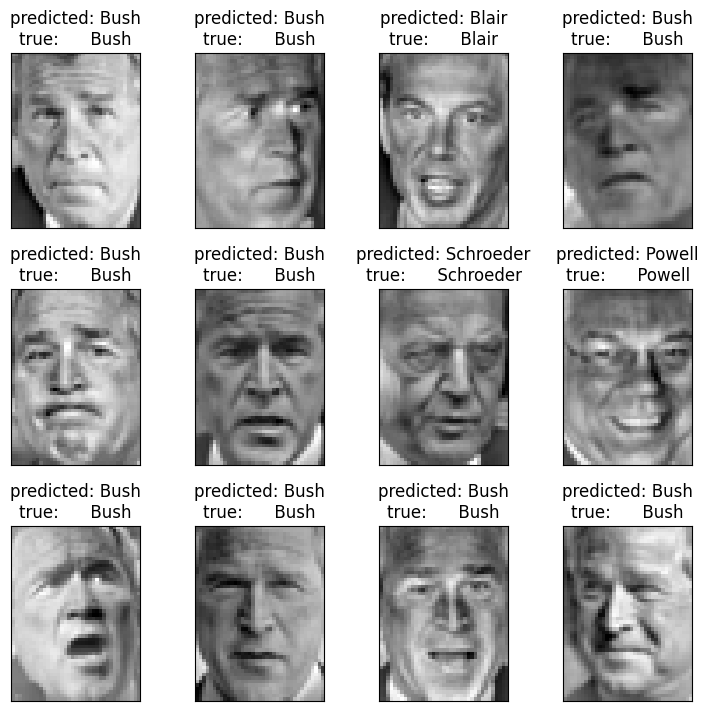

In [44]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()

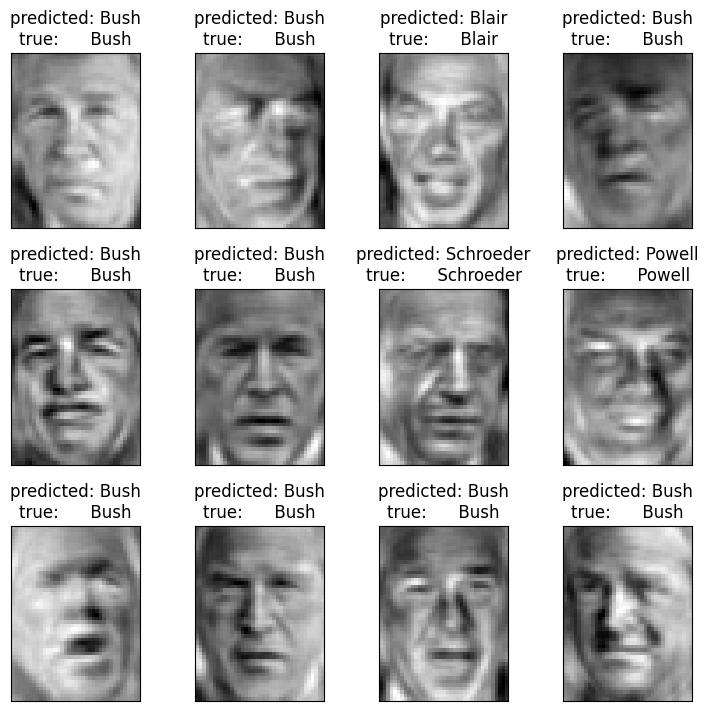

In [45]:
# plot PCA reconstructed faces
plot_gallery(pca.inverse_transform(X_test_pca), prediction_titles, h, w)

plt.show()

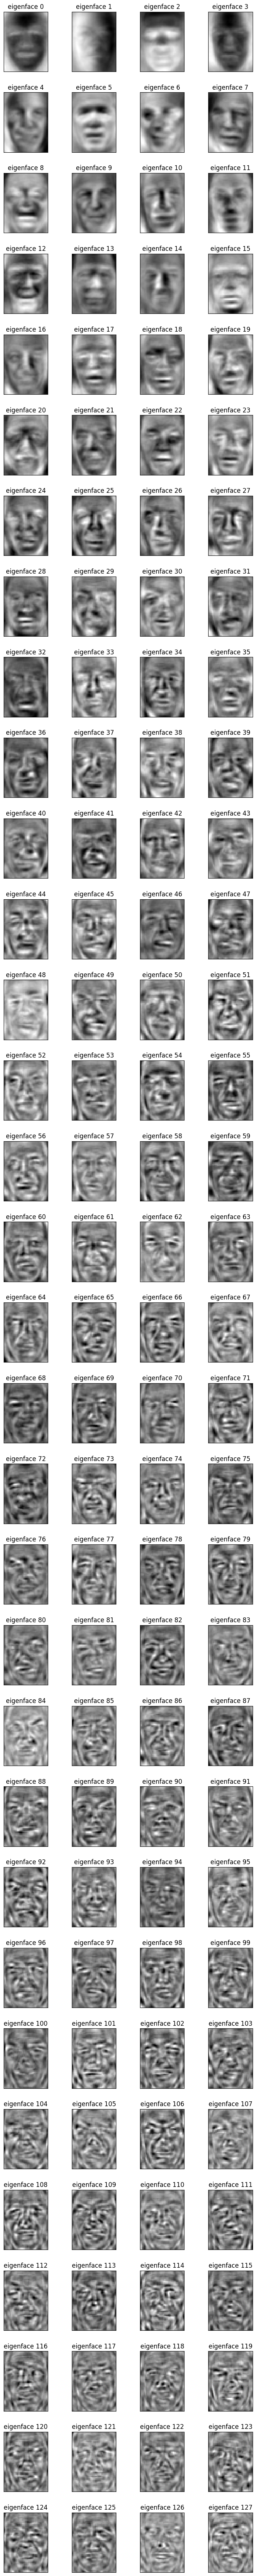

In [46]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, int(eigenfaces.shape[0] / 4)+1, 4)


plt.show()

# <font color='red'>**Exercise:**

* <mark> try various classifiers
 * <mark>KNeighborsClassifier(n_neighbours)
 * <mark>GaussianNB()
 * <mark>LinearDiscriminantAnalysis()
 * <mark>DecisionTreeClassifier(max_depth=jj)
 * <mark>Boosted/bagged decision trees


* <mark>and various number of PCA eigenfaces

# <font color='green'> **Simple optimization of hyperparameters**



1.   Define the classifier: KNeighborsClassifier has one hyperparameter *n_neighbors*
2.   Give a list of hyperparameter values to be tested.
3.   GridSearchCV - exhaustive search over specified parameter values for an estimator.



```
# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)
```





---



---



---




# **Visualization and classification of the hand-written digits dataset**
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification.

**Same exercise as one week ago, but this time with ensamble learning.**



In [47]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each event is an 8x8 image



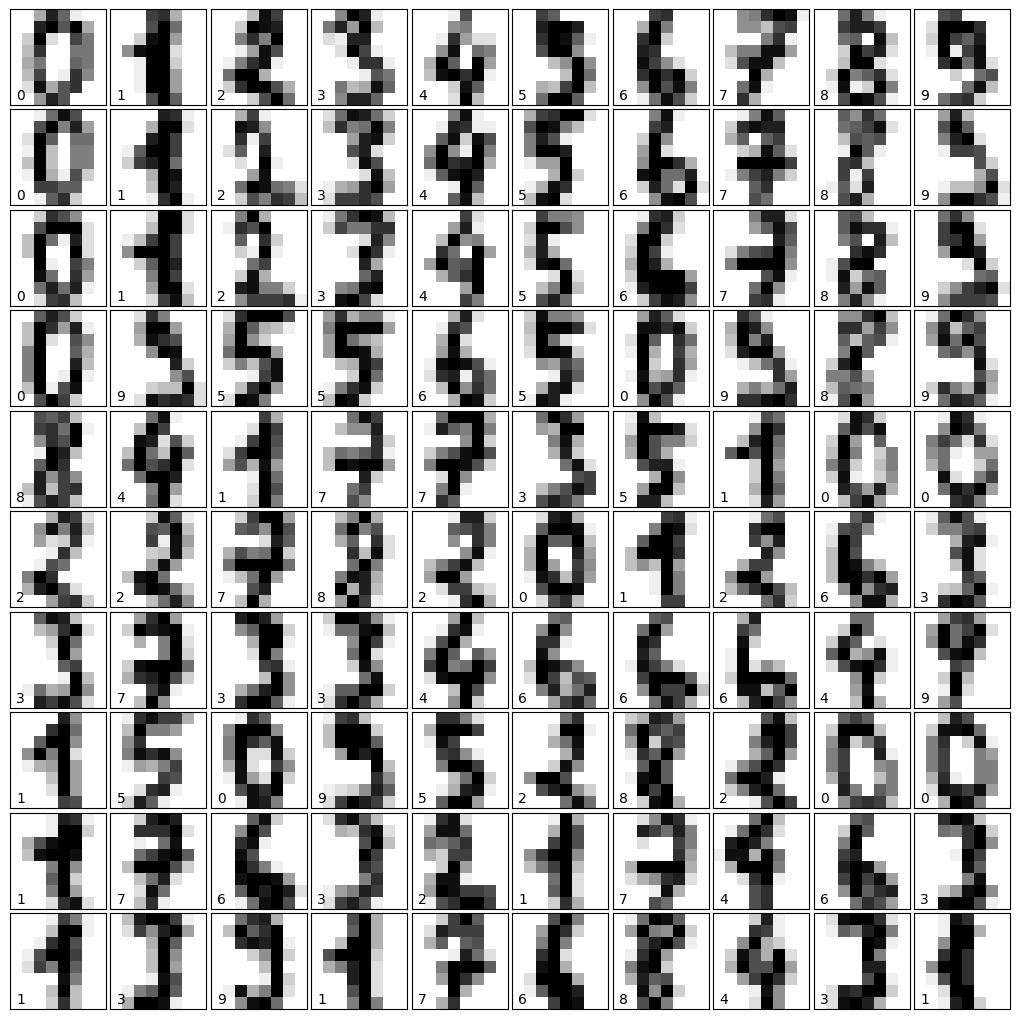

In [48]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

#**Quantify the performance**




In [49]:
from sklearn.decomposition import PCA
# Number of components after PCA
n_components=64

pca = PCA(n_components)

proj = pca.fit_transform(digits.data)

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


<BarContainer object of 64 artists>

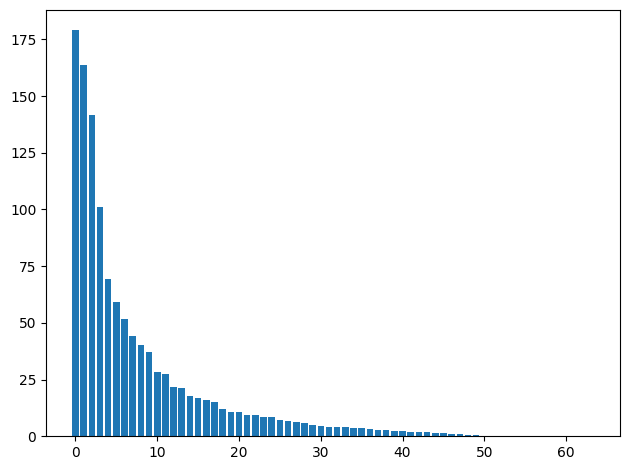

In [50]:

principal = pca.explained_variance_
print(pca.explained_variance_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal.size)], principal)


#**Split data into train and test datasets**

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split

# Instead of 8x8 digits we have PCA transformed vectors of the length n_components
# split the data into training and validation sets
seed = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(digits.data), digits.target, random_state=seed)

print(X_test.shape, X_test.shape)

(450, 64) (450, 64)


## **Classify with Naive Bayes Classifies / Fisher Linear Discriminants /  decision trees and Boosted Decision Trees**

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# train the model
# comment out the model you don't use
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(10)
#clf = DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=200)
#clf = GradientBoostingClassifier(max_depth=5,n_estimators=100)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)

# use the model to predict the labels of the test data
# test data were not used for training!
predicted = clf.predict(X_test)
expected = y_test


print("Score = ",clf.score(X_test, y_test))


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=200)
Score =  0.9555555555555556


Plot the predictions.

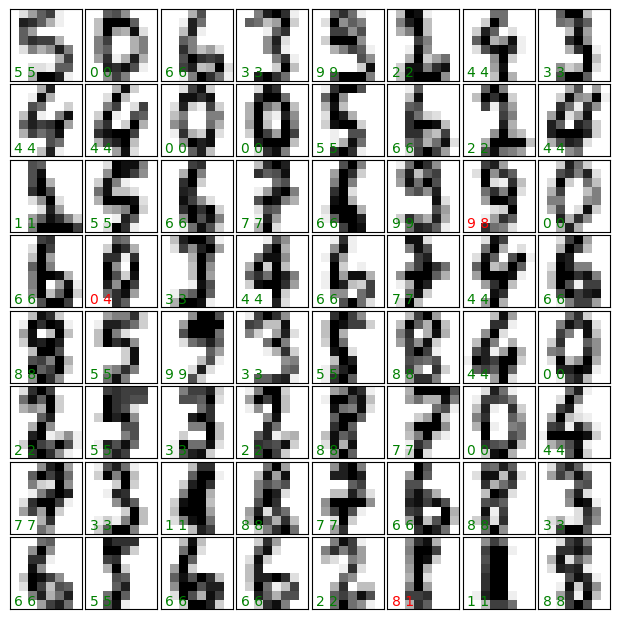

In [53]:

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# split the original data (i.e. images!) into training and validation sets
XP_train, XP_test, yP_train, yP_test = train_test_split(digits.data, digits.target, random_state=seed)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(XP_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

In the plot above first label is the expected (true) digit, second the reconstructed digit


Number of matches

In [54]:
matches = (predicted == expected)
print(matches.sum())

430


The total number of data points



In [55]:
print(len(matches))

450


And now, the ratio of correct predictions



In [56]:
matches.sum() / float(len(matches))

0.9555555555555556

# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [57]:
from sklearn import metrics
cm = metrics.confusion_matrix(expected, predicted)
print(cm)


[[36  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  1  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  1  0  0  0  1]
 [ 0  0  0  0 53  0  1  2  0  1]
 [ 0  0  0  0  0 51  0  0  0  1]
 [ 2  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  0  0  0 36  2  0]
 [ 0  3  1  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  0  0  0  1 40]]


Display confusion matrix

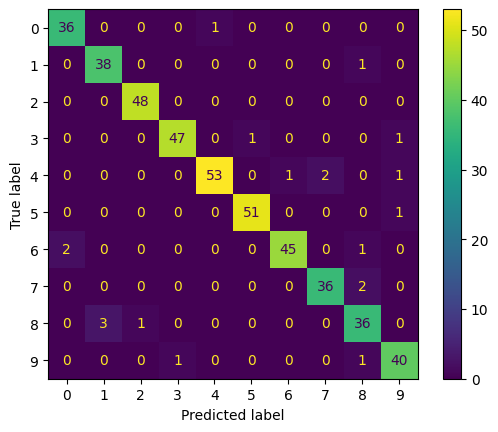

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


---
---
---




#<font color='green'> **Independent Component Analysis ICA**

* <span style="color:#280099">Developed at Helsinki University of Technology   </span>    <span style="color:#FF0000"> _[http://www\.cis\.hut\.fi/projects/ica/](http://www.cis.hut.fi/projects/ica/)_ </span>
* <span style="color:#800000"> __Problem:__ </span>
  * <span style="color:#000000">Assume\, that signal </span>  <span style="color:#0033CC"> __X__ </span>  <span style="color:#000000"> is a linear combination </span>  <span style="color:#0033CC"> __X = AS__ </span>  <span style="color:#000000"> of independent sources  </span>  <span style="color:#0033CC"> __S__ </span>  <span style="color:#000000">\. The mixing matrix </span>  <span style="color:#0033CC"> __A__ </span>  <span style="color:#000000"> and vector of sources </span>  <span style="color:#0033CC"> __S__ </span>  <span style="color:#000000"> are unknown</span>  <span style="color:#000000"> _\._ </span>
  * <span style="color:#000000"> __Task:__ </span>  <span style="color:#000000"> find a matrix </span>  <span style="color:#0000FF"> __T \(inverted__ </span>  <span style="color:#000000"> </span>  <span style="color:#0000FF"> __A\)__ </span>  <span style="color:#000000">\, such that elements of vector</span>  <span style="color:#000000"> </span>  <span style="color:#0000FF"> __U = TX__ </span>  <span style="color:#000000"> are statistically independent</span>  <span style="color:#000000"> \. </span>  <span style="color:#0000FF"> __T__ </span>   is the matrix returning the original signals\.

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_414.png)



* <span style="color:#800000"> __Applications:__ </span>
  * <span style="color:#000000">Filtering of one source out of many others\,</span>
  * <span style="color:#000000">Separation of signals in telecommunication\,</span>
  * <span style="color:#000000">Separation of signals from different regions of brain\,</span>
  * <span style="color:#000000">Signal separation in astrophysics\,</span>
  * <span style="color:#000000">Decomposition of signals in accelerator beam analysis in FERMILAB\.</span>



![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_415.jpg)





#<font color='green'>**How does ICA work?**

<span style="color:#000000">We have **two measured signals** and we want to separate them into two independent sources\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_416.jpg)

<span style="color:#000000">**Preparing data \- decorrelation & whitening** \(correlation coefficients equal zero\, </span>  <span style="color:#000000">σ</span>  <span style="color:#000000">=1\)\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_417.jpg)

 <span style="color:#800000"> **Superposition of many independent distributions gives Gaussian in the limit\.** </span>

<span style="color:#000000">**ICA – rotation**\, signals should be maximally **non\-Gaussian** \(measure of non\-Gaussianity might be curtosis\)\.</span>

<span style="color:#000000"> __Curtosis:__</span>

$$ Kurt = \frac{1/n \sum_{i=1}^n (x_i-\mu)^4 }{\sigma^4} -3  $$


<span style="color:#000000"> where
_μ_ </span>  <span style="color:#000000"> is the mean of the distribution and _σ_ is a standard deviation\. </span>

Kurtosis is maximized:

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_418.jpg)

giving the separation of both signals.





#<font color='green'>**ICA – brain research\, signal separation**

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_420.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_421.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_422.png)

<span style="color:#000000">3 components from 21\-dimensional decomposition using the “spatial\-ICA'' algorithm\. </span>

<span style="color:#000000"> _PNAS February 21\, 2012 vol\. 109 no\. 8 3131\-3136_ </span>




<span style="color:#800000"> __ICA and magnetic resonance__ </span>


![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_423.png)

**Left: measured signals** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Right: separated components**

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_424.png)



_Blind Source Separation in Magnetic Resonance Images_

_January 30\, 2010 by Shubhendu Trived_  


##**ICA in radioastronomy**

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_425.png)

<span style="color:#000000">Left: HST images of the NGC 7023 North\-West PDR</span>
<span style="color:#000000">in three SDSS wide\-band filters\. </span>  <span style="color:#000000">

Right</span>  <span style="color:#000000">: scattered light and ERE \(Extended Red Emission\) images extracted with </span>  <span style="color:#000000">FastICA </span>  <span style="color:#000000">from the observations\.</span>

*A&A 479\, L41\-L44 \(2008\)*

_DOI: 10\.1051/0004\-6361:20079158_



# **Example of ICA in scikit learn**


In [59]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

Define "time" as 2000 points in the range 0 to 8

In [60]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
print(time)

[0.000000e+00 4.002001e-03 8.004002e-03 ... 7.991996e+00 7.995998e+00
 8.000000e+00]


Three signals: sinus, sign and sawtooth

In [61]:
s1 = np.sin(2 * time)  # sinus
#s1 = np.sign(np.sin(3 * time))*np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))  # sign
#s2 = np.sign(np.sin(3 * time))*np.cos(2*time)
s3 = signal.sawtooth(2 * np.pi * time) # sawtooth
#s3 = signal.sawtooth(2 * np.pi * time)*np.sin(6 * time) # sawtooth
print(s1.shape)

(2000,)


Draw processes

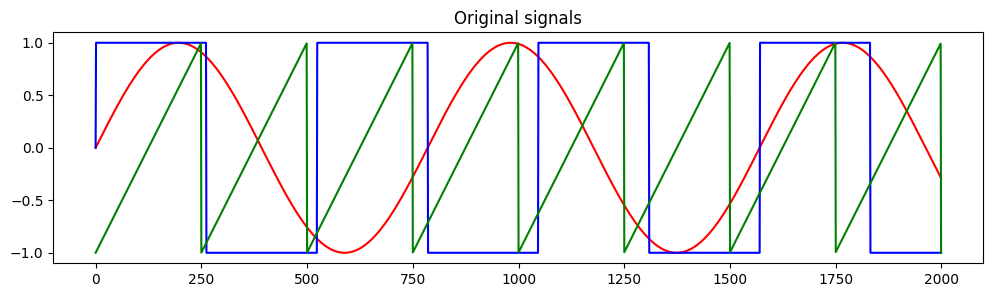

In [62]:
plt.figure(figsize=(12,3))

names = ["Original signals"]
colors = ['red', 'blue', 'green']

plt.title(names[0])
plt.plot(s1, colors[0])
plt.plot(s2, colors[1])
plt.plot(s3, colors[2])

plt.show()

Prepare data

In [63]:
# Concatenate, out of three (2000,1) arrays build one (2000,3) array
S = np.c_[s1, s2, s3]
print(S.shape)
# Adding some noise
S += 0.1 * np.random.normal(size=S.shape)
# Normalize - divide by the standard deviation
S /= S.std(axis=0)

# A is an arbitrary mixing matrix. We should recover it using ICA
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
# Identity matrix - no mixing
#A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print("Mixing matrix: ")
print(A)

# Multiply S by the mixing matrix
X = np.dot(S, A)

(2000, 3)
Mixing matrix: 
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]


Perform ICA with 3 components

In [64]:
ica = FastICA(n_components=3)
# recover the ICA predicted signals
S_ica = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Draw projections

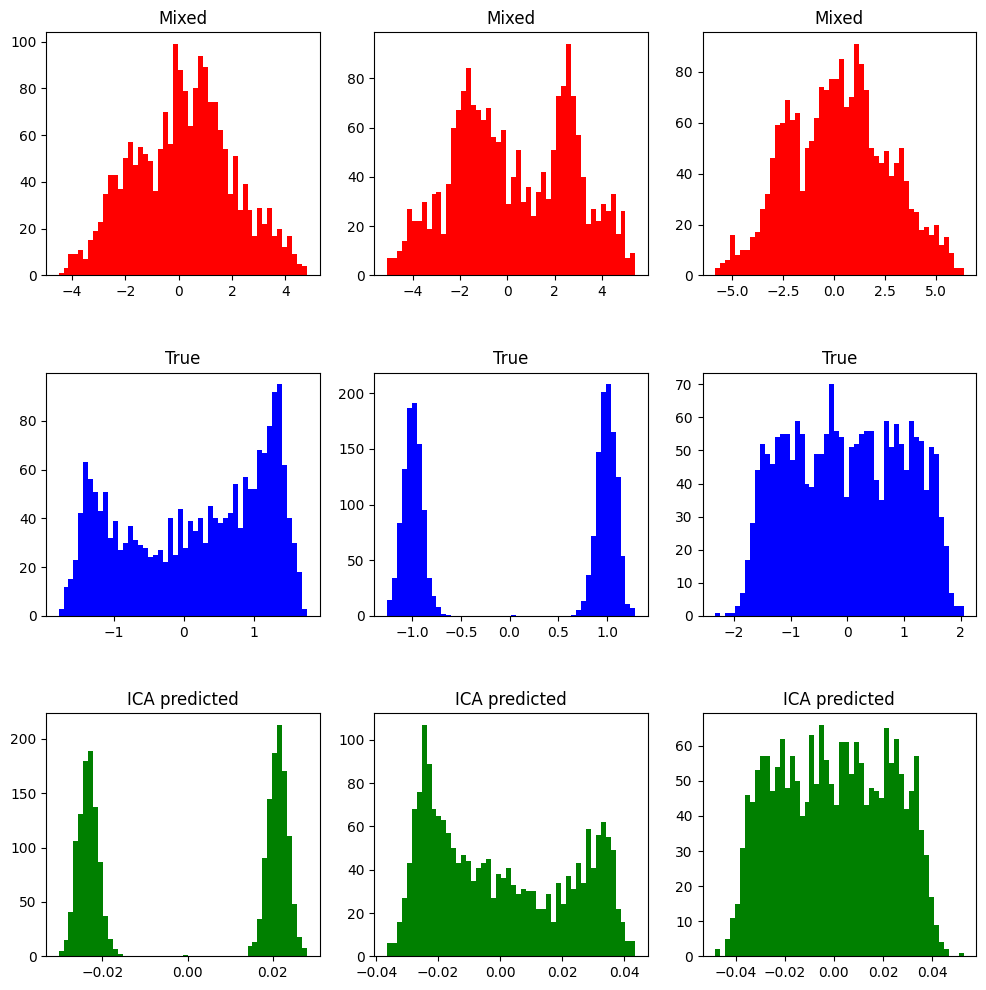

In [65]:
###############################################################################
# Plot projections
###############################################################################

plt.figure(figsize=(12,12))
n_bins = 50

models = [X, S, S_ica]
names = ["Mixed", "True", "ICA predicted"]



for m in range(0,3):
 for k in range(0,3):
  plt.subplot(3, 3, 3*m+k+1)
  #print(models[m][:,k])
  plt.hist(models[m][:,k], color=colors[m], bins=n_bins)
  plt.title(names[m])


plt.subplots_adjust(hspace=0.4)
plt.show()

Draw processes

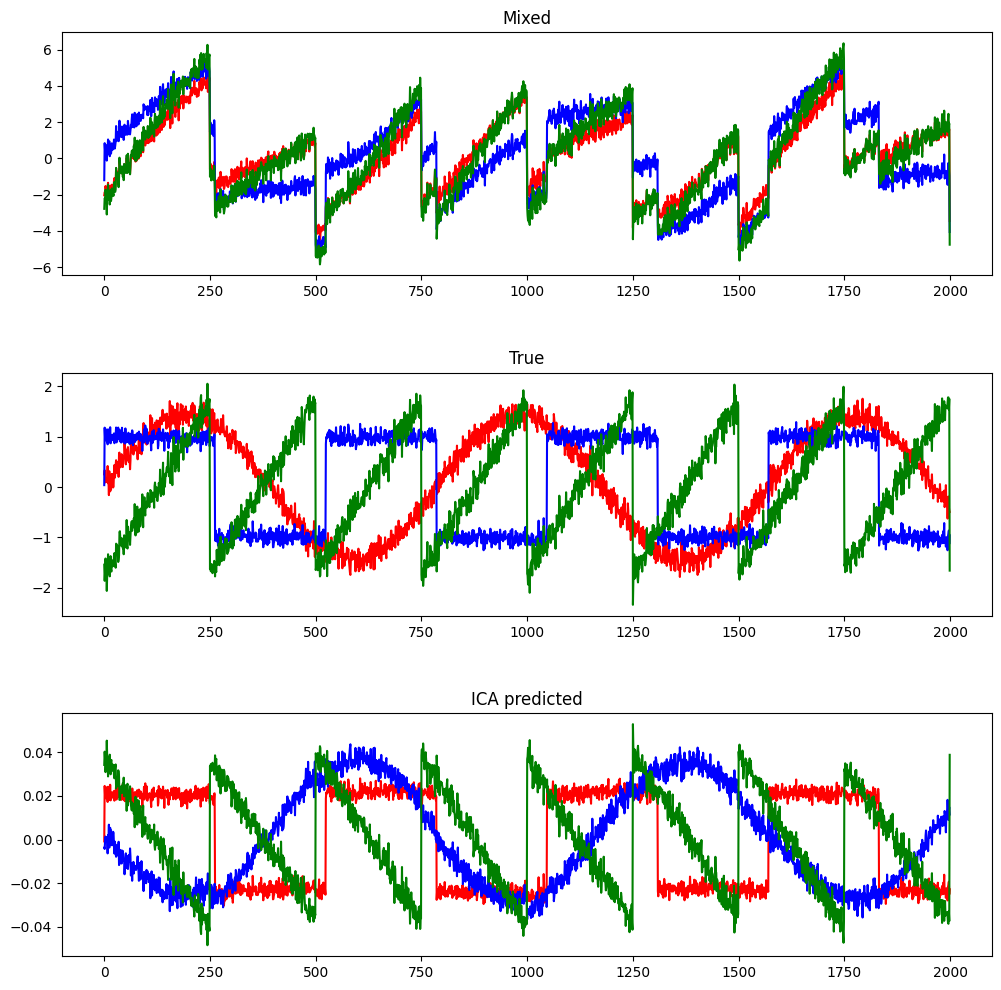

In [66]:
plt.figure(figsize=(12,12))

models = [X, S, S_ica]
names = ["Mixed", "True", "ICA predicted"]


for i, model in enumerate(models):
    plt.subplot(3, 1, i+1)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
    plt.title(names[i])

plt.subplots_adjust(hspace=0.4)
plt.show()



---


# <font color='red'> **Exercise:**
* <mark>try to applie ICA to some different signals

#<font color='green'> **Summary**

* ICA - powerfull tool for signal separation
* Allows to get clean signals from a mixt of sources.


#<font color='green'> **Summary**

* <span style="color:#000000">We have learned about simple classifiers…\.</span>
 * K Nearest Neighbors
 * Decision Tree
 * Kernel density estimators
* **We can make strong classifier out of weak classifiers by ensamble learning:**
 * Boosting - AdaBoost
 * Bagging
* Boosted/Bagged Decision Trees are a powerful, nonlinear machine learning tools.
* **ICA - a powerfull tool for signal separation**
  * Allows to get clean signals from a mixt of sources.

